In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,
2010,2.531000e+09,0,0,0.000000,2010
2011,2.686000e+09,0,0,0.000000,2011
2012,2.640000e+09,0,0,0.000000,2012
2013,2.702000e+09,0,0,0.000000,2013
2014,2.814000e+09,0,0,0.000000,2014
2015,2.643000e+09,0,0,0.000000,2015
2016,2.574000e+09,0,0,0.000000,2016
2017,1.954000e+09,0,0,0.000000,2017
2018,1.922000e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -1143799999 ± 292018287 (95% confidence)


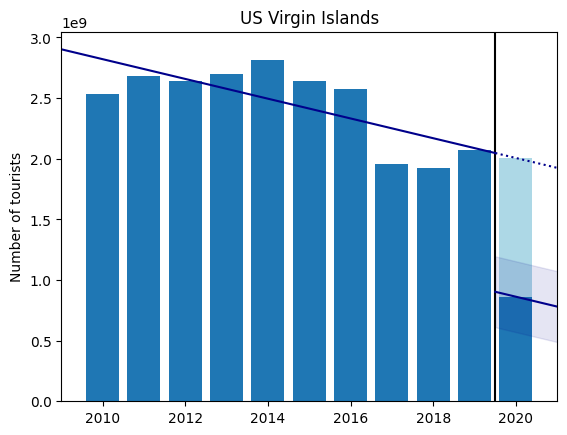

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     50.47
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.91e-05
Time:                        16:29:33   Log-Likelihood:                 11.092
No. Observations:                  11   AIC:                            -16.18
Df Residuals:                       8   BIC:                            -14.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        93.0084     22.957      4.051

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [3]:
# Set up plot
plt.title('US Virgin Islands')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)